In [81]:
!pip uninstall umap --yes

Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Successfully uninstalled umap-0.1.1


In [80]:
!pip install umap-learn

  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76570 sha256=59206bcbb15c342864a08430c518ed9751511c4d87ac0b16bdd94c5a8da900d1
  Stored in directory: c:\users\mind_ds\appdata\local\pip\cache\wheels\95\85\b7\b4b7040e49367b6d1505d7e8fb57e3e79b22fa6ac26f72520b
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52366 sha256=03213141b716eb75101317240363aa88492e9c1958a5ffab087510b23dede34c
  Stored in directory: c:\users\mind_ds\appdata\local\pip\cache\wheels\c7\0d\f8\e89d09e0c7419141e444bd59072cc195df4a88785c1052834b
Successfully built umap-learn pynndescent


In [82]:
## Clustering
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from sklearn import cluster
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from nltk.cluster import KMeansClusterer
import nltk
import umap.umap_ as umap
# import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
# for Plotting
import plotly.io as plt_io
import plotly.graph_objects as go

## Data Science
import pandas as pd
import os
import sys
#%load_ext autotime
import re
import csv
import pandas as pd
import numpy as np
import os
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
#from matplotlib_venn import venn2, venn3
import warnings
import time
import datetime as dt
import itertools
#import pandasql as ps
import seaborn as sns
import json
from ast import literal_eval
import ast

## Feature Extraction

In [26]:
df = pd.read_csv(r"C:\Users\MIND_DS\Dropbox (Partners HealthCare)\NLP\Tanish\BigDataSets\Regex_match\FINAL\MASTER_7_14.csv")

C:\Users\MIND_DS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'EMPI', 'MRN', 'PatientID', 'PatientEncounterID',
       'ContactDTS', 'EncounterTypeDSC', 'NoteID', 'InpatientNoteTypeDSC',
       'buckets', 'NoteCSNID', 'LineNBR', 'NoteTXT', 'regex_location',
       'regex_sent', 'regex_match', 'match_count', 'pruned_regex_location',
       'merged_row_location', 'merged_regex_sent', 'merged_regex_match',
       'padded_merged_row_location', 'padded_merged_regex_sent',
       'padded_char_count', 'note_char_count', 'PCPID',
       'EncounterEpicProviderID', 'pcp_flag', 'SpecialtyDSC',
       'padded_regex_match'],
      dtype='object')

In [28]:
len(df)

279224

In [29]:
len(df["PatientEncounterID"].unique())

178994

In [30]:
empi = pd.read_csv(r"C:\Users\MIND_DS\Dropbox (Partners HealthCare)\NLP\Tanish\BigDataSets\Regex_match\FINAL\empi_dataset.csv")

In [31]:
empi.columns

Index(['Unnamed: 0', 'EMPI', 'Age', 'Subject_Id', 'Gender', 'Race',
       'Ethnicity', 'Vital_Status', 'array_mega', 'array_meg', 'array_gsa',
       'array_mega_ex', 'Affection.Status', 'fa_had_AD', 'mo_had_AD',
       'sib_had_AD', 'rs7412_T', 'rs429358_C', 'APOE', 'DOB', 'APOE_dosage',
       'AD status'],
      dtype='object')

In [32]:
empi = empi.dropna(thresh=5) #thresh = 5 b/c 37 nulls have all null values
len(empi)

16428

In [33]:
empi

,Unnamed: 0,EMPI,Age,Subject_Id,Gender,Race,Ethnicity,Vital_Status,array_mega,array_meg,...,Affection.Status,fa_had_AD,mo_had_AD,sib_had_AD,rs7412_T,rs429358_C,APOE,DOB,APOE_dosage,AD status
0,0,100000272,87,10042180,M,Black,Non-Hispanic,Living,No,Yes,...,0.0,No,No,No,0.0,0.0,e3/e3,NaN,NaN,NaN
1,1,100001150,95,10037423,F,Black,Non-Hispanic,Deceased,No,Yes,...,0.0,No,No,No,0.0,0.0,e3/e3,NaN,NaN,NaN
2,2,100001768,73,10053858,M,Black,Non-Hispanic,Living,No,Yes,...,0.0,No,No,No,0.0,1.0,e3/e4,NaN,NaN,NaN
3,3,100002288,98,10004537,M,White,Non-Hispanic,Deceased,No,No,...,0.0,No,No,No,0.0,0.0,e3/e3,NaN,NaN,NaN
4,4,100002702,74,10119609,M,Black,Non-Hispanic,Living,No,No,...,0.0,No,No,No,0.0,0.0,e3/e3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16460,16460,113714475,63,10121570,M,White,Non-Hispanic,Living,No,No,...,0.0,No,No,No,0.0,1.0,e3/e4,NaN,NaN,NaN
16461,16461,113716850,77,10024427,M,White,Non-Hispanic,Living,No,Yes,...,0.0,No,No,No,0.0,1.0,e3/e4,NaN,NaN,NaN
16462,16462,113722466,70,10062443,F,White,Hispanic,Living,No,Yes,...,0.0,No,No,No,0.0,0.0,e3/e3,NaN,NaN,NaN
16463,16463,113722742,64,10111290,F,White,Non-Hispanic,Living,No,No,...,0.0,No,No,No,0.0,0.0,e3/e3,NaN,NaN,NaN


In [34]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,EMPI,MRN,PatientID,PatientEncounterID,ContactDTS,...,merged_regex_match,padded_merged_row_location,padded_merged_regex_sent,padded_char_count,note_char_count,PCPID,EncounterEpicProviderID,pcp_flag,SpecialtyDSC,padded_regex_match
0,0,0,0,0,0.0,100000272,10040002098,Z6352398,3.076070e+09,2015-06-17 00:00:00.0000000,...,[' cerebral'],"(5457, 6251)",ked at HMS in the department of psychobiology ...,794,19217.0,NaN,1521494.0,0,NaN,['cerebral']
1,1,1,1,1,1.0,100000272,10040002098,Z6352398,3.076214e+09,2015-07-16 00:00:00.0000000,...,[' memory'],"(3248, 4044)",or lymphadenopathy. Chest: Clear to auscultati...,796,5850.0,NaN,1012865.0,0,NaN,['memory']
2,2,2,2,2,14.0,100000272,10040002098,Z6352398,3.242118e+09,2019-03-14 00:00:00.0000000,...,[' dementia'],"(8345, 9145)",ession alone in the meta-analysis. We discusse...,800,13298.0,1002888.0,1668416.0,0,NaN,['dementia']
3,3,3,3,3,15.0,100000272,10040002098,Z6352398,3.322836e+09,2020-12-04 00:00:00.0000000,...,"[' moca', ' cognition', ' memory']","[(930, 1152), (4778, 4987), (5004, 5349)]",------- ing tylenol really accept for this we...,803,8711.0,1002888.0,1746848.0,0,NaN,"['cognition', 'memory', 'moca']"
4,4,4,4,4,20.0,100000272,10040002098,Z6352398,3.325561e+09,2020-09-18 00:00:00.0000000,...,"[' cognition', ' memory']","[(5188, 5576), (5593, 5991)]",------- in is related to cancer. Reassuringly...,804,9145.0,1002888.0,1746848.0,0,NaN,"['cognition', 'memory']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279219,279219,60817,60817,277874,NaN,113705759,10127549029,Z16320629,3.285425e+09,2020-04-28 00:00:00.0000000,...,"[' memory', ' cognition', ' cerebral', ' cereb...","[(538, 547), (1626, 1635), (1844, 1853), (108,...","------- se ""she took a break"" and wants to dis...",1949,11314.0,1007065.0,1558180.0,0,NaN,"['cognition', 'memory', 'cerebellar', 'cerebral']"
279220,279220,60818,60818,277883,NaN,113705759,10127549029,Z16320629,3.305416e+09,2020-09-22 00:00:00.0000000,...,"[' memory', ' cognition', ' cerebral', ' cereb...","[(323, 332), (1411, 1420), (1629, 1638), (108,...","------- all of her medications, including asp...",1734,10113.0,1007065.0,1558180.0,0,NaN,"['cognition', 'memory', 'cerebellar', 'cerebral']"
279221,279221,60819,60819,277896,NaN,113705759,10127549029,Z16320629,3.327430e+09,2021-01-25 00:00:00.0000000,...,"[' cognition', ' cerebral', ' memory', ' cereb...","[(2816, 2824), (108, 117), (326, 335), (974, 9...","------- ? Patient, Chart, daughter Olga Mode o...",3009,12320.0,1007065.0,1558180.0,0,NaN,"['dementia', 'cognition', 'memory', 'mci', 'ce..."
279222,279222,60820,60820,277912,NaN,113705759,10127549029,Z16320629,3.349755e+09,2021-04-20 00:00:00.0000000,...,"[' cognition', ' cerebral', ' cognitive impair...","[(2103, 2111), (108, 117), (326, 335), (544, 5...","------- ? Patient, Chart, daughter Olga Mode o...",2835,11250.0,1007065.0,1558180.0,0,NaN,"['dementia', 'cognition', 'moca', 'cognitive i..."


In [35]:
df = pd.merge(df, empi, left_on = 'EMPI', right_on = 'EMPI', how = 'left')

In [131]:
speciality = pd.read_csv(r"C:\Users\MIND_DS\Dropbox (Partners HealthCare)\NLP\Tanish\BigDataSets\Regex_match\FINAL\speciality_counts.csv")

In [135]:
speciality.head()

,EMPI,SpecialtyDSC
0,100000272,0
1,100000521,0
2,100000623,0
3,100000894,0
4,100000920,0


In [136]:
df = pd.merge(df, speciality, left_on = 'EMPI', right_on = 'EMPI', how = 'left')

In [137]:
len(df["PatientEncounterID"].unique())

178994

In [139]:
df.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'EMPI', 'MRN', 'PatientID', 'PatientEncounterID',
       'ContactDTS', 'EncounterTypeDSC', 'NoteID', 'InpatientNoteTypeDSC',
       'buckets', 'NoteCSNID', 'LineNBR', 'NoteTXT', 'regex_location',
       'regex_sent', 'regex_match', 'match_count', 'pruned_regex_location',
       'merged_row_location', 'merged_regex_sent', 'merged_regex_match',
       'padded_merged_row_location', 'padded_merged_regex_sent',
       'padded_char_count', 'note_char_count', 'PCPID',
       'EncounterEpicProviderID', 'pcp_flag', 'SpecialtyDSC_x',
       'padded_regex_match', 'Unnamed: 0_y', 'Age', 'Subject_Id', 'Gender',
       'Race', 'Ethnicity', 'Vital_Status', 'array_mega', 'array_meg',
       'array_gsa', 'array_mega_ex', 'Affection.Status', 'fa_had_AD',
       'mo_had_AD', 'sib_had_AD', 'rs7412_T', 'rs429358_C', 'APOE', 'DOB',
       'APOE_dosage', 'AD status', 'contains_memory', 'contains_dementia

In [142]:
df["SpecialtyDSC_y"]

0         0
1         0
2         0
3         0
4         0
         ..
279219    0
279220    0
279221    0
279222    0
279223    0
Name: SpecialtyDSC_y, Length: 279224, dtype: int64

In [144]:
encounter_match_count = pd.read_csv(r"C:\Users\MIND_DS\Dropbox (Partners HealthCare)\NLP\Tanish\BigDataSets\Regex_match\FINAL\totals_everything.csv")

In [151]:
encounter_match_count

,Unnamed: 0,EMPI,encounter_count,dementia,cognition,memory,mmse,moca,alzheimer,cognitive impairment,...,neurocognitive,lewy,pick's,corticobasal,cerebral,cerebrovascular,amnesia,ad,lbd,match_count
0,0.0,100000272.0,8.000000,2,4,7,0,3,0,1,...,0,0,0,0,1,0,0,0,0,19.000000
1,1.0,100001150.0,35.000000,40,7,2,0,0,0,4,...,0,0,0,0,0,12,1,0,0,69.000000
2,2.0,100001768.0,32.000000,0,6,37,0,7,0,7,...,2,0,0,0,2,0,0,0,0,65.000000
3,3.0,100002288.0,5.000000,4,8,3,0,4,0,5,...,1,0,0,0,0,0,0,0,0,26.000000
4,4.0,100002702.0,12.000000,6,6,6,0,0,0,0,...,0,0,0,0,4,1,0,0,0,27.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,16461.0,113716850.0,4.000000,0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
16462,16462.0,113722466.0,5.000000,0,4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5.000000
16463,16463.0,113722742.0,11.000000,0,7,7,0,0,0,0,...,0,0,0,0,1,0,0,0,0,18.000000
16464,16464.0,113727131.0,1.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000


In [146]:
drop = [100566134,
 101272386,
 103302871,
 103401919,
 104131445,
 104434122,
 104846067,
 105444588,
 106594083,
 106950781,
 107158726,
 107359494,
 110961570,
 111505997,
 100141139,
 100274613,
 100344755,
 100355466,
 100617631,
 100855298,
 101766574,
 101770739,
 101959132,
 102020367,
 102470097,
 103029314,
 103040962,
 103097401,
 103789921,
 104297481,
 104390508,
 104772819,
 105537030,
 105807236,
 108951869,
 111132607,
 111172213]

In [147]:
tmp = encounter_match_count
e_m_c_c = encounter_match_count

In [148]:
for i in range(len(drop)):
    tmp = e_m_c_c[e_m_c_c["EMPI"] != drop[i]]
    e_m_c_c = tmp

In [149]:
encounter_match_count = tmp

In [150]:
len(encounter_match_count) #last row is sums so that is why len is 1 + N

16429

In [152]:
df = pd.merge(df, encounter_match_count, left_on = 'EMPI', right_on = 'EMPI', how = 'left')

In [157]:
df["encounter_count"]

0          8.0
1          8.0
2          8.0
3          8.0
4          8.0
          ... 
279219    10.0
279220    10.0
279221    10.0
279222    10.0
279223     3.0
Name: encounter_count, Length: 279224, dtype: float64

In [153]:
df

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,EMPI,MRN,PatientID,PatientEncounterID,ContactDTS,...,neurocognitive,lewy,pick's,corticobasal,cerebral,cerebrovascular,amnesia,ad,lbd,match_count_y
0,0,0,0,0,0.0,100000272,10040002098,Z6352398,3.076070e+09,2015-06-17 00:00:00.0000000,...,0,0,0,0,1,0,0,0,0,19.0
1,1,1,1,1,1.0,100000272,10040002098,Z6352398,3.076214e+09,2015-07-16 00:00:00.0000000,...,0,0,0,0,1,0,0,0,0,19.0
2,2,2,2,2,14.0,100000272,10040002098,Z6352398,3.242118e+09,2019-03-14 00:00:00.0000000,...,0,0,0,0,1,0,0,0,0,19.0
3,3,3,3,3,15.0,100000272,10040002098,Z6352398,3.322836e+09,2020-12-04 00:00:00.0000000,...,0,0,0,0,1,0,0,0,0,19.0
4,4,4,4,4,20.0,100000272,10040002098,Z6352398,3.325561e+09,2020-09-18 00:00:00.0000000,...,0,0,0,0,1,0,0,0,0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279219,279219,60817,60817,277874,NaN,113705759,10127549029,Z16320629,3.285425e+09,2020-04-28 00:00:00.0000000,...,0,0,0,0,5,1,0,0,0,34.0
279220,279220,60818,60818,277883,NaN,113705759,10127549029,Z16320629,3.305416e+09,2020-09-22 00:00:00.0000000,...,0,0,0,0,5,1,0,0,0,34.0
279221,279221,60819,60819,277896,NaN,113705759,10127549029,Z16320629,3.327430e+09,2021-01-25 00:00:00.0000000,...,0,0,0,0,5,1,0,0,0,34.0
279222,279222,60820,60820,277912,NaN,113705759,10127549029,Z16320629,3.349755e+09,2021-04-20 00:00:00.0000000,...,0,0,0,0,5,1,0,0,0,34.0


1. Attempt 1: Clustering on Memory, Cognition, and Dementia (3 most common keyword matches), 10K matches for each keywword

2. Attempt 2: Clustering on Memory, Cognition (Top 2 keyword matches) and Cerebellar, Neurocognitive (2 of the keywords with # of matches on the smaller side), 5K matches per keyword

3. Attempt 3: Same keywords, but "improved" features (Added vital status, match_count, and count of speciality visits)

## Gathering cluster data

In [46]:
pattern_mem = re.compile(r'\bmemory\b', re.IGNORECASE)
c_matches = []
for note in tqdm(df["padded_merged_regex_sent"]):
    try:
        m = list(set(re.findall(pattern_mem, note)))
        m = list(set(m))
        c_matches.append(str(m))
    except:
        c_matches.append([])
df["contains_memory"] = c_matches

100%|███████████████████████████████████████████████████████████████████████| 279224/279224 [00:10<00:00, 26930.99it/s]


In [98]:
# pattern_dementia = re.compile(r'\bdementia\b', re.IGNORECASE)
# d_matches = []
# for note in tqdm(df["padded_merged_regex_sent"]):
#     try:
#         m = list(set(re.findall(pattern_dementia, note)))
#         m = list(set(m))
#         d_matches.append(str(m))
#     except:
#         d_matches.append([])
# df["contains_dementia"] = d_matches

100%|███████████████████████████████████████████████████████████████████████| 279224/279224 [00:10<00:00, 26709.31it/s]


In [99]:
pattern_cog = re.compile(r'\bcognition\b', re.IGNORECASE)
cog_matches = []
for note in tqdm(df["padded_merged_regex_sent"]):
    try:
        m = list(set(re.findall(pattern_cog, note)))
        m = list(set(m))
        cog_matches.append(str(m))
    except:
        cog_matches.append([])
df["contains_cognition"] = cog_matches

100%|███████████████████████████████████████████████████████████████████████| 279224/279224 [00:10<00:00, 27180.55it/s]


In [118]:
pattern_cerebellar = re.compile(r'\bcerebellar\b', re.IGNORECASE)
cerebellar_matches = []
for note in tqdm(df["padded_merged_regex_sent"]):
    try:
        m = list(set(re.findall(pattern_cerebellar, note)))
        m = list(set(m))
        cerebellar_matches.append(str(m))
    except:
        cerebellar_matches.append([])
df["contains_cerebellar"] = cerebellar_matches

100%|███████████████████████████████████████████████████████████████████████| 279224/279224 [00:11<00:00, 24036.35it/s]


In [119]:
pattern_neurocogntive = re.compile(r'\bneurocognitive\b', re.IGNORECASE)
neurocogntive_matches = []
for note in tqdm(df["padded_merged_regex_sent"]):
    try:
        m = list(set(re.findall(pattern_neurocogntive, note)))
        m = list(set(m))
        neurocogntive_matches.append(str(m))
    except:
        neurocogntive_matches.append([])
df["contains_neurocognitive"] = neurocogntive_matches

100%|███████████████████████████████████████████████████████████████████████| 279224/279224 [00:10<00:00, 27399.66it/s]


In [158]:
memory = df[df["contains_memory"] != "[]"]

In [159]:
# dementia = df[df["contains_dementia"] != "[]"]
cognition = df[df["contains_cognition"] != "[]"]

In [160]:
cerebellar = df[df["contains_cerebellar"] != "[]"]
neurocognitive = df[df["contains_neurocognitive"] != "[]"]

In [161]:
len(memory)

109218

In [162]:
len(cognition)

(10000, 87655)

In [163]:
len(cerebellar), len(neurocognitive)

(26863, 7711)

In [164]:
memory = memory[:5000]
#dementia = dementia[:5000]
cognition = cognition[:5000]
cerebellar = cerebellar[:5000]
neurocognitive = neurocognitive[:5000]

In [165]:
merged = pd.concat([memory, cognition, cerebellar, neurocognitive])

In [168]:
merged.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'EMPI', 'MRN', 'PatientID', 'PatientEncounterID',
       'ContactDTS', 'EncounterTypeDSC', 'NoteID', 'InpatientNoteTypeDSC',
       'buckets', 'NoteCSNID', 'LineNBR', 'NoteTXT', 'regex_location',
       'regex_sent', 'regex_match', 'match_count_x', 'pruned_regex_location',
       'merged_row_location', 'merged_regex_sent', 'merged_regex_match',
       'padded_merged_row_location', 'padded_merged_regex_sent',
       'padded_char_count', 'note_char_count', 'PCPID',
       'EncounterEpicProviderID', 'pcp_flag', 'SpecialtyDSC_x',
       'padded_regex_match', 'Unnamed: 0_y', 'Age', 'Subject_Id', 'Gender',
       'Race', 'Ethnicity', 'Vital_Status', 'array_mega', 'array_meg',
       'array_gsa', 'array_mega_ex', 'Affection.Status', 'fa_had_AD',
       'mo_had_AD', 'sib_had_AD', 'rs7412_T', 'rs429358_C', 'APOE', 'DOB',
       'APOE_dosage', 'AD status', 'contains_memory', 'contains_dement

In [180]:
merged["SpecialtyDSC_y"]

1          0
3          0
4          0
5          0
6          0
          ..
253771     8
253772     8
253773     8
253779    12
253780    12
Name: SpecialtyDSC_y, Length: 20000, dtype: int64

In [227]:
type(merged)

pandas.core.frame.DataFrame

In [229]:
x = merged[['pcp_flag', 'Age',  'Gender', 'Race', 'APOE', 'Vital_Status', 'SpecialtyDSC_y', 'match_count_y']]
x = pd.DataFrame(x, columns = ['pcp_flag', 'Age',  'Gender', 'Race', 'APOE', 'Vital_Status', 'SpecialtyDSC_y', 'match_count_y'])

In [212]:
x_2 = df[['pcp_flag', 'Age',  'Gender', 'Race', 'APOE', 'Vital_Status', 'SpecialtyDSC_y', 'match_count_y']]

In [230]:
type(x)

pandas.core.frame.DataFrame

In [183]:
g = {'M' : 2, 'F' : 1, 'U' : 0}
r = {'White' : 4, 'Black' : 3, 'Unknown' : 2, 'Other' : 1, 'Asian' : 0}
#e = {'Non-Hispanic' : 1, 'Hispanic' : 0}
a = {'e3/e3' : 5, 'e3/e4' : 4, 'e2/e3' : 3, 'e2/e4 or e1/e3' : 2, 'e4/e4' : 1 , 'e2/e2' : 0}
v = {'Living' : 1, 'Deceased' : 0}

In [184]:
x.Gender = [g[item] for item in x.Gender]
x.Race = [r[item] for item in x.Race]
#x.Ethnicity = [e[item] for item in x.Ethnicity]
x.APOE = [a[item] for item in x.APOE]
x.Vital_Status = [v[item] for item in x.Vital_Status]

C:\Users\MIND_DS\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [213]:
x_2.Gender = [g[item] for item in x_2.Gender]
x_2.Race = [r[item] for item in x_2.Race]
#x.Ethnicity = [e[item] for item in x.Ethnicity]
x_2.APOE = [a[item] for item in x_2.APOE]
x_2.Vital_Status = [v[item] for item in x_2.Vital_Status]

C:\Users\MIND_DS\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [185]:
x

,pcp_flag,Age,Gender,Race,APOE,Vital_Status,SpecialtyDSC_y,match_count_y
1,0,87,2,3,5,1,0,19.0
3,0,87,2,3,5,1,0,19.0
4,0,87,2,3,5,1,0,19.0
5,0,87,2,3,5,1,0,19.0
6,0,87,2,3,5,1,0,19.0
...,...,...,...,...,...,...,...,...
253771,0,87,1,4,5,1,8,1072.0
253772,0,87,1,4,5,1,8,1072.0
253773,0,87,1,4,5,1,8,1072.0
253779,0,78,2,4,5,1,12,104.0


<AxesSubplot:>

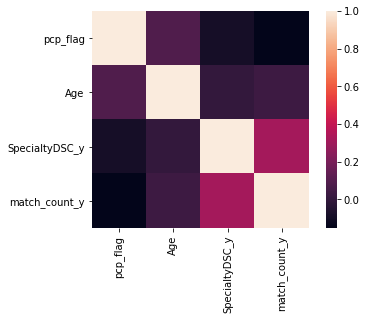

In [231]:
cor = x.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

<AxesSubplot:>

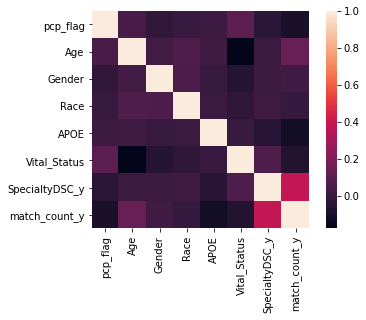

In [232]:
cor_2 = x_2.corr() #Calculate the correlation of the above variables
sns.heatmap(cor_2, square = True) #Plot the correlation as heat map

## UMAP

In [186]:
x = preprocessing.StandardScaler().fit_transform(x)
start = time.time()
reducer = umap.UMAP(random_state = 42, n_components = 2, n_neighbors = 20, min_dist = 0.00) # default setting: n_neighbors = 15, min_dist = 0.01
embedding = reducer.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 83.22225213050842 seconds


## PCA

In [195]:
start = time.time()
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 0.07163476943969727 seconds


## t-SNE

In [199]:
start = time.time()
pca_2 = PCA(n_components = 2)
pca_result_2 = pca_2.fit_transform(x)
tsne = TSNE(random_state = 42, n_components = 2, verbose = 0, perplexity = 40, n_iter = 400).fit_transform(pca_result_2)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 34.09054899215698 seconds


In [215]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 18)
k_means.fit(x_2)

KMeans(n_clusters=18)

In [216]:
labels = k_means.predict(x_2)
centroids = k_means.cluster_centers_

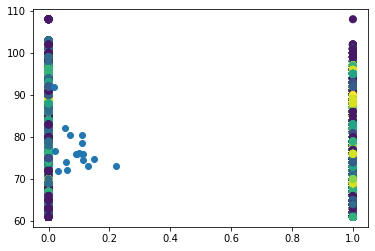

In [221]:
plt.scatter(x_2.iloc[:, 0], x_2.iloc[:, 1], c = labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1])
plt.show()

In [202]:
# plot 2d
def plot_2d(component1, component2):
    y_2 = component2
    fig = go.Figure(
        data = go.Scatter(
            x = component1,
            y = component2,
            mode = 'markers',
            marker = dict(
                size = 8,
                #color = y_2, #set color equal to a variable
                colorscale = 'Picnic', # options: Picnic, Rainbow, Earth, Bluered, Portland
                showscale = True,
                line_width = 1
            )
        )
    )
    fig.update_layout(margin = dict(l = 50, r = 50, b = 50, t = 50), width = 1000, height = 600)                 
    fig.layout.template = 'plotly_dark'
    fig.show()

In [197]:
#plot_2d(principal_components[:, 0], principal_components[:, 1])

In [201]:
#plot_2d(tsne[:, 0], tsne[:, 1])